# Advanced Convolutional Neural Networks (CNN) - 1
- Objective: try different structures of CNNs
- Note: examples are performed on **i5 7600 + gtx 1060 6GB **

## Deeper Networks
- It is one of definite trends that CNN models submitted to ILSVRC are getting deeper and deeper

<br>

<img src="https://cdn-images-1.medium.com/max/756/1*Io-I-fOM0jGftDb_nne4KQ.png" style="width: 600px"/>

<br>

- Deeper networks are able to learn more "abstract" representations by comprising more operations and nonlinearities 
- However, they are difficult and costly to train and prone to overfitting
<br>
<img src="http://cs231n.github.io/assets/cnnvis/filt1.jpeg" style="width: 400px"/>

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

## Load Dataset
- MNIST Dataset
- Doc: https://keras.io/datasets/

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
# reshaping X data: (n, 28, 28) => (n, 28, 28, 1)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2], 1))

In [5]:
# converting y data into categorical (one-hot encoding)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [6]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)
(60000, 10)
(10000, 10)


## 0. Basic CNN model
- Basic CNN similar to what we made before
- One convolutional & pooling layer

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D

In [8]:
def basic_cnn():
    model = Sequential()
    
    model.add(Conv2D(input_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3]), filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))

    # prior layer should be flattend to be connected to dense layers
    model.add(Flatten())
    # dense layer with 50 neurons
    model.add(Dense(50, activation = 'relu'))
    # final layer with 10 neurons to classify the instances
    model.add(Dense(10, activation = 'softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
    
    return model    

In [9]:
model = basic_cnn()

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 50)        500       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 50)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 50)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9800)              0         
_________________________________________________________________
dense (Dense)                (None, 50)                490050    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                510       
Total params: 491,060
Trainable params: 491,060
Non-trainable params: 0
__________________________________________________

In [14]:
%%time
N=5
history = model.fit(X_train, y_train, batch_size = 50, validation_split = 0.2, epochs = N, verbose = 1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 14s 282us/sample - loss: 0.0067 - accuracy: 0.9980 - val_loss: 0.2425 - val_accuracy: 0.9777
Epoch 2/5
48000/48000 [==============================] - 14s 290us/sample - loss: 0.0065 - accuracy: 0.9984 - val_loss: 0.2278 - val_accuracy: 0.9755
Epoch 3/5
48000/48000 [==============================] - 14s 287us/sample - loss: 0.0114 - accuracy: 0.9971 - val_loss: 0.2631 - val_accuracy: 0.9754
Epoch 4/5
48000/48000 [==============================] - 14s 292us/sample - loss: 0.0125 - accuracy: 0.9969 - val_loss: 0.2567 - val_accuracy: 0.9764
Epoch 5/5
48000/48000 [==============================] - 14s 288us/sample - loss: 0.0120 - accuracy: 0.9974 - val_loss: 0.2574 - val_accuracy: 0.9776
CPU times: user 6min 38s, sys: 25.3 s, total: 7min 3s
Wall time: 1min 9s


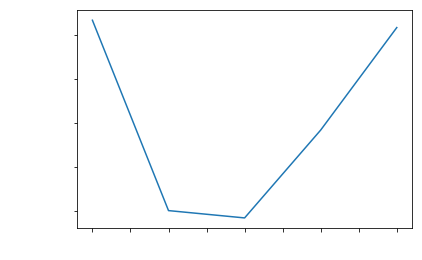

In [15]:
plt.clf()
plt.plot(history.history['val_accuracy'])
plt.xticks(color='w',fontsize=18)
plt.yticks(color='w',fontsize=18)
plt.show()

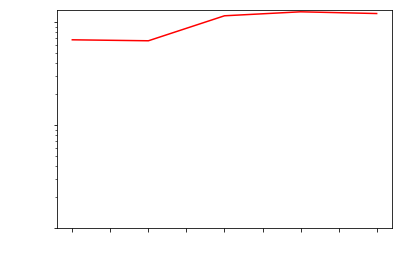

In [16]:
plt.clf()
plt.semilogy(history.history['loss'],'r-')
plt.xticks(color='w',fontsize=18)
plt.yticks([1e-2,1e-3,1e-4],color='w',fontsize=18)
plt.show()

In [19]:
results = model.evaluate(X_test, y_test,verbose=0)

In [20]:
print('Test accuracy: ', results[1])

Test accuracy:  0.9799


## 1. Deep CNN - 1
- Deeper network with 6 convolutional layers and 3 pooling layers
- Note that two (3x3) convolutional layers are stacked
    - It is equivalent to using one (5X5) convolutional layer, but with fewer parameters
    - Similar to the structured used in VGGnet

<img src="http://www.hirokatsukataoka.net/research/cnnfeatureevaluation/cnnarchitecture.jpg" style="width: 600px"/>

In [21]:
def deep_cnn():
    model = Sequential()
    
    model.add(Conv2D(input_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3]), filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same'))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    
    # prior layer should be flattend to be connected to dense layers
    model.add(Flatten())
    # dense layer with 50 neurons
    model.add(Dense(50, activation = 'relu'))
    # final layer with 10 neurons to classify the instances
    model.add(Dense(10, activation = 'softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
    
    return model    

In [22]:
model = deep_cnn()

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 50)        500       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 50)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 50)        22550     
_________________________________________________________________
activation_2 (Activation)    (None, 28, 28, 50)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 50)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 50)        22550     
_________________________________________________________________
activation_3 (Activation)    (None, 14, 14, 50)       

In [33]:
%%time
N = 5
history = model.fit(X_train, y_train, batch_size = 50, validation_split = 0.2, epochs = N, verbose = 1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 125s 3ms/sample - loss: 0.4288 - accuracy: 0.8579 - val_loss: 0.1409 - val_accuracy: 0.9610
Epoch 2/5
48000/48000 [==============================] - 124s 3ms/sample - loss: 0.1471 - accuracy: 0.9529 - val_loss: 0.0518 - val_accuracy: 0.9862
Epoch 3/5
48000/48000 [==============================] - 123s 3ms/sample - loss: 0.1091 - accuracy: 0.9656 - val_loss: 0.0431 - val_accuracy: 0.9886
Epoch 4/5
48000/48000 [==============================] - 123s 3ms/sample - loss: 0.0910 - accuracy: 0.9706 - val_loss: 0.0300 - val_accuracy: 0.9922
Epoch 5/5
48000/48000 [==============================] - 124s 3ms/sample - loss: 0.0757 - accuracy: 0.9758 - val_loss: 0.0487 - val_accuracy: 0.9889
CPU times: user 1h 22min 38s, sys: 2min 40s, total: 1h 25min 18s
Wall time: 10min 19s


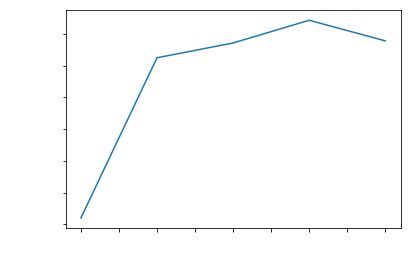

In [34]:
plt.clf()
plt.plot(history.history['val_accuracy'])
plt.xticks(color='w',fontsize=18)
plt.yticks(color='w',fontsize=18)
plt.show()

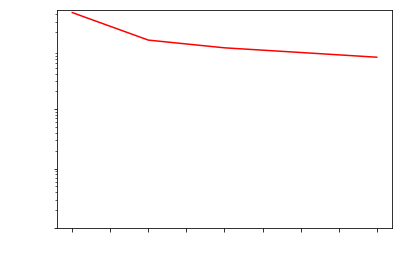

In [35]:
plt.clf()
plt.semilogy(history.history['loss'],'r-')
plt.xticks(color='w',fontsize=18)
plt.yticks([1e-2,1e-3,1e-4],color='w',fontsize=18)
plt.show()

Training is rather unstable; accuracy falling down after around 80 epochs

In [36]:
results = model.evaluate(X_test, y_test,verbose=0)

In [37]:
print('Test accuracy: ', results[1])

Test accuracy:  0.9909


## 2. Deep CNN - 2
- Measures used to ameliorate the performance of MLPs are employed
    - Weight Initialization
    - Batch Normalization
    - Dropout

In [38]:
from tensorflow.keras.layers import BatchNormalization, Dropout

In [39]:
def deep_cnn_advanced():
    model = Sequential()
    
    model.add(Conv2D(input_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3]), filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    
    # prior layer should be flattend to be connected to dense layers
    model.add(Flatten())
    # dense layer with 50 neurons
    model.add(Dense(50, activation = 'relu', kernel_initializer='he_normal'))
    model.add(Dropout(0.5))
    # final layer with 10 neurons to classify the instances
    model.add(Dense(10, activation = 'softmax', kernel_initializer='he_normal'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
    
    return model    

In [40]:
model = deep_cnn_advanced()

In [41]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 28, 28, 50)        500       
_________________________________________________________________
batch_normalization_6 (Batch (None, 28, 28, 50)        200       
_________________________________________________________________
activation_13 (Activation)   (None, 28, 28, 50)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 28, 28, 50)        22550     
_________________________________________________________________
batch_normalization_7 (Batch (None, 28, 28, 50)        200       
_________________________________________________________________
activation_14 (Activation)   (None, 28, 28, 50)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 50)       

In [42]:
%%time
N = 5
history = model.fit(X_train, y_train, batch_size = 50, validation_split = 0.2, epochs = N, verbose = 1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 127s 3ms/sample - loss: 0.3668 - accuracy: 0.8820 - val_loss: 0.0656 - val_accuracy: 0.9805
Epoch 2/5
48000/48000 [==============================] - 123s 3ms/sample - loss: 0.1184 - accuracy: 0.9651 - val_loss: 0.0650 - val_accuracy: 0.9824
Epoch 3/5
48000/48000 [==============================] - 123s 3ms/sample - loss: 0.0893 - accuracy: 0.9737 - val_loss: 0.0419 - val_accuracy: 0.9865
Epoch 4/5
48000/48000 [==============================] - 123s 3ms/sample - loss: 0.0708 - accuracy: 0.9798 - val_loss: 0.0470 - val_accuracy: 0.9878
Epoch 5/5
48000/48000 [==============================] - 123s 3ms/sample - loss: 0.0614 - accuracy: 0.9831 - val_loss: 0.0351 - val_accuracy: 0.9897
CPU times: user 1h 22min 38s, sys: 2min 38s, total: 1h 25min 16s
Wall time: 10min 19s


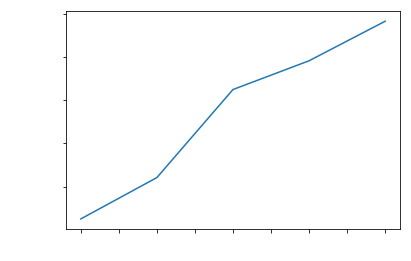

In [43]:
plt.clf()
plt.plot(history.history['val_accuracy'])
plt.xticks(color='w',fontsize=18)
plt.yticks(color='w',fontsize=18)
plt.show()

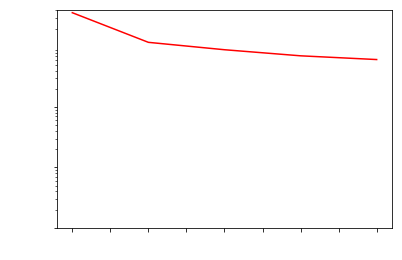

In [44]:
plt.clf()
plt.semilogy(history.history['loss'],'r-')
plt.xticks(color='w',fontsize=18)
plt.yticks([1e-2,1e-3,1e-4],color='w',fontsize=18)
plt.show()

Stable and comparable result is obtained

In [47]:
results = model.evaluate(X_test, y_test,verbose=0)

In [48]:
print('Test accuracy: ', results[1])

Test accuracy:  0.9892


## 3. Deep CNN - 3
- One of the ways to reduce the number of parameters in a model is proposed in Min et al 2013 (https://arxiv.org/abs/1312.4400)
- Namely "Network In Network (NIN)" or "1 X 1 convolutions"
    - Method is simple - adding convolutional layers after other convolutional layers
    - Has the effect of reducing the dimensionality (depth) of image space, effectively reducing the number of parameters
    
<img src="https://raw.githubusercontent.com/iamaaditya/iamaaditya.github.io/master/images/conv_arithmetic/full_padding_no_strides_transposed_small.gif" style="width: 200px"/>

<br>
- GoogleNet architecture (Inception) utilizes NIN structure

<img src="https://raw.githubusercontent.com/iamaaditya/iamaaditya.github.io/master/images/inception_1x1.png" style="width: 800px"/>

In [49]:
def deep_cnn_advanced_nin():
    model = Sequential()
    
    model.add(Conv2D(input_shape = (X_train.shape[1], X_train.shape[2], X_train.shape[3]), filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(Conv2D(filters = 25, kernel_size = (1,1), strides = (1,1), padding = 'valid', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(Conv2D(filters = 25, kernel_size = (1,1), strides = (1,1), padding = 'valid', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(Conv2D(filters = 25, kernel_size = (1,1), strides = (1,1), padding = 'valid', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(Conv2D(filters = 25, kernel_size = (1,1), strides = (1,1), padding = 'valid', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(filters = 50, kernel_size = (3,3), strides = (1,1), padding = 'same', kernel_initializer='he_normal'))
    model.add(Conv2D(filters = 25, kernel_size = (1,1), strides = (1,1), padding = 'valid', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size = (2,2)))
    
    # prior layer should be flattend to be connected to dense layers
    model.add(Flatten())
    # dense layer with 50 neurons
    model.add(Dense(50, activation = 'relu', kernel_initializer='he_normal'))
    model.add(Dropout(0.5))
    # final layer with 10 neurons to classify the instances
    model.add(Dense(10, activation = 'softmax', kernel_initializer='he_normal'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
    
    return model 

In [50]:
model = deep_cnn_advanced_nin()

In [51]:
model.summary()    # note that the number of parameters are greatly reduced

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 28, 28, 50)        500       
_________________________________________________________________
batch_normalization_12 (Batc (None, 28, 28, 50)        200       
_________________________________________________________________
activation_19 (Activation)   (None, 28, 28, 50)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 28, 28, 50)        22550     
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 28, 28, 25)        1275      
_________________________________________________________________
batch_normalization_13 (Batc (None, 28, 28, 25)        100       
_________________________________________________________________
activation_20 (Activation)   (None, 28, 28, 25)       

In [52]:
%%time
N = 5
history = model.fit(X_train, y_train, batch_size = 50, validation_split = 0.2, epochs = N, verbose = 1)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 114s 2ms/sample - loss: 0.4037 - accuracy: 0.8722 - val_loss: 0.0821 - val_accuracy: 0.9754
Epoch 2/5
48000/48000 [==============================] - 110s 2ms/sample - loss: 0.1287 - accuracy: 0.9633 - val_loss: 0.0909 - val_accuracy: 0.9728
Epoch 3/5
48000/48000 [==============================] - 110s 2ms/sample - loss: 0.0967 - accuracy: 0.9732 - val_loss: 0.0399 - val_accuracy: 0.9883
Epoch 4/5
48000/48000 [==============================] - 111s 2ms/sample - loss: 0.0777 - accuracy: 0.9772 - val_loss: 0.0357 - val_accuracy: 0.9901
Epoch 5/5
48000/48000 [==============================] - 110s 2ms/sample - loss: 0.0691 - accuracy: 0.9794 - val_loss: 0.0377 - val_accuracy: 0.9897
CPU times: user 1h 11min 47s, sys: 2min 43s, total: 1h 14min 31s
Wall time: 9min 14s


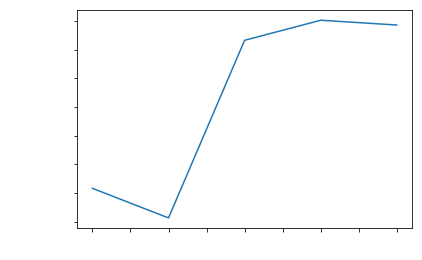

In [53]:
plt.clf()
plt.plot(history.history['val_accuracy'])
plt.xticks(color='w',fontsize=18)
plt.yticks(color='w',fontsize=18)
plt.show()

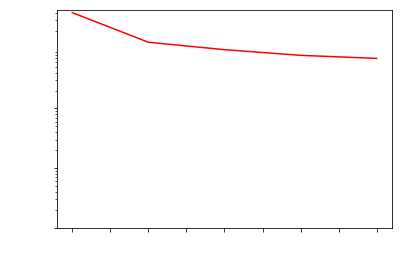

In [54]:
plt.clf()
plt.semilogy(history.history['loss'],'r-')
plt.xticks(color='w',fontsize=18)
plt.yticks([1e-2,1e-3,1e-4],color='w',fontsize=18)
plt.show()

Fairly stable result even with smaller number of parameters

In [55]:
results = model.evaluate(X_test, y_test,verbose=0)

In [56]:
print('Test accuracy: ', results[1])

Test accuracy:  0.9896


Summary
---

.                 | S0 | S1 | S2 | S3 
------------------|:--:|:--:|:--:|:--:
num. layers       | 6  | 18 | 25 | 30 
deg. free   (1e5) | 490| 136| 137| 87
test acc.         | 98%| 94%| 99%| 99%
100-epoch time (m)| 13 | 19 | 38 | 47
unstable          |    | Yes|    |